# Global E-commerce Trends Analysis 📊

**Objective:** This project analyzes a global e-commerce dataset to identify key drivers of sales performance and uncover actionable insights that could inform marketing, sales, and product strategies.



## 1. Setup and Data Loading

First, we'll import the necessary Python libraries for data manipulation, analysis, and visualization. Then, we will load our dataset.

In [22]:
import pandas as pd

df = pd.read_csv("online_retail.csv")

#display first few row
print(df.head())

# Get a summary of the data 

print(df.info())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice 

## 2. Data Cleaning and Preprocessing

Before we can analyze the data, we need to clean and prepare it. This ensures our analysis is accurate and reliable.

### 2.1 Handle Missing and Invalid Data
We will remove rows with missing `Customer ID`s as they cannot be used for customer-level analysis. We will also filter out returns (invoices starting with 'C') as they are not actual sales.

In [ ]:
df.dropna(subset=['Customer ID'], inplace=True)

: 

In [ ]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]

: 

### 2.2 Feature Engineering
We will create new columns like `TotalPrice` and extract time-based features (`Month`, `DayOfWeek`, `Hour`) from the `InvoiceDate` to facilitate deeper analysis.
```python
# Create TotalPrice column

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['Price']



: 

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6
df['Hour'] = df['InvoiceDate'].dt.hour
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country YearMonth  Month  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom   2009-12     12   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   2009-12     12   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom   2009-12     12   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom   2009-12     12   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom   2009-12     12   

   DayOfWeek  Hour  TotalPrice  
0          1     7        83.4  
1          1     7        81.0  
2          

: 

# Business Overview

## 3. Exploratory Data Analysis (EDA)

Now we will explore the data to answer key business questions and uncover trends.

### 3.1 What are the monthly sales trends?
A line chart will help us visualize revenue over time to identify growth and seasonality.

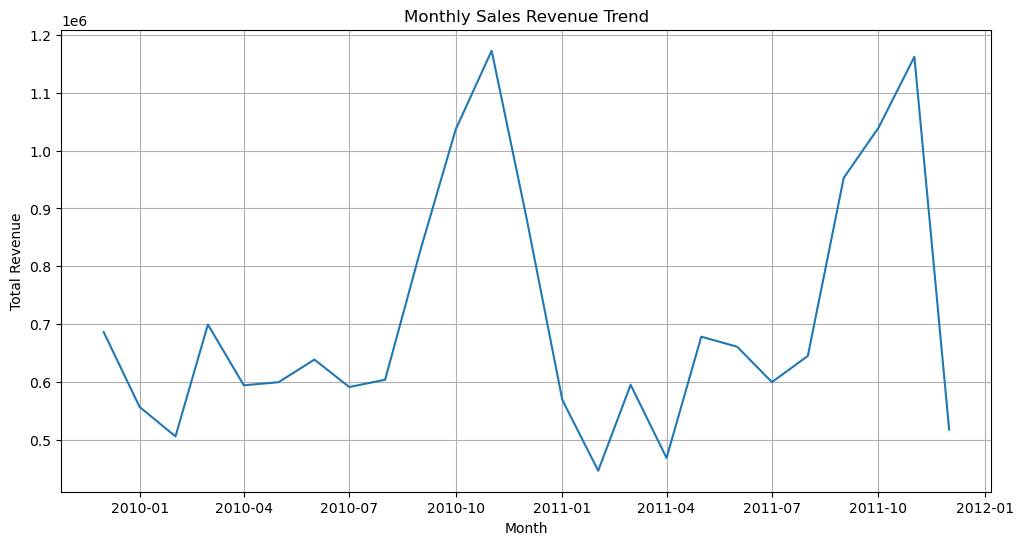

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_revenue)
plt.title('Monthly Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

**Insight:** The business shows a consistent upward trend in monthly revenue, with a significant spike in sales during the November-December period, likely due to holiday shopping.

### 3.2 Where are our biggest markets? 
To understand our global footprint, let's visualize the top 10 countries by total sales revenue.

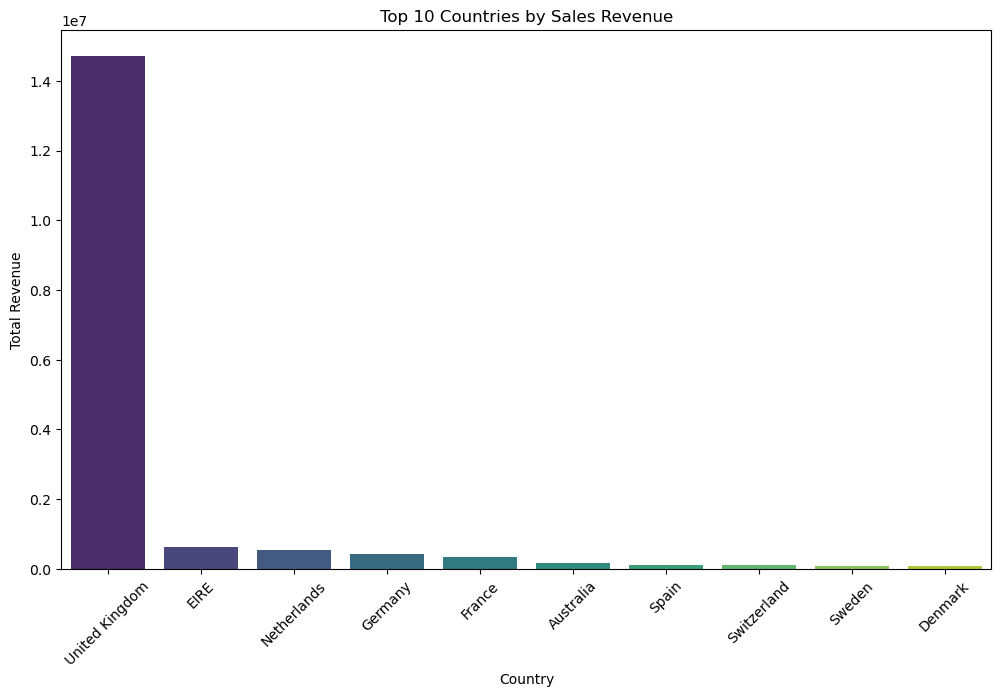

In [12]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='viridis')
plt.title('Top 10 Countries by Sales Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Insight:** The UK is clearly the dominant market. However, Germany shows significant revenue, making it a strong candidate for targeted marketing campaigns.

# Product Time analysis

### Best-Selling Products: What should we keep in stock?

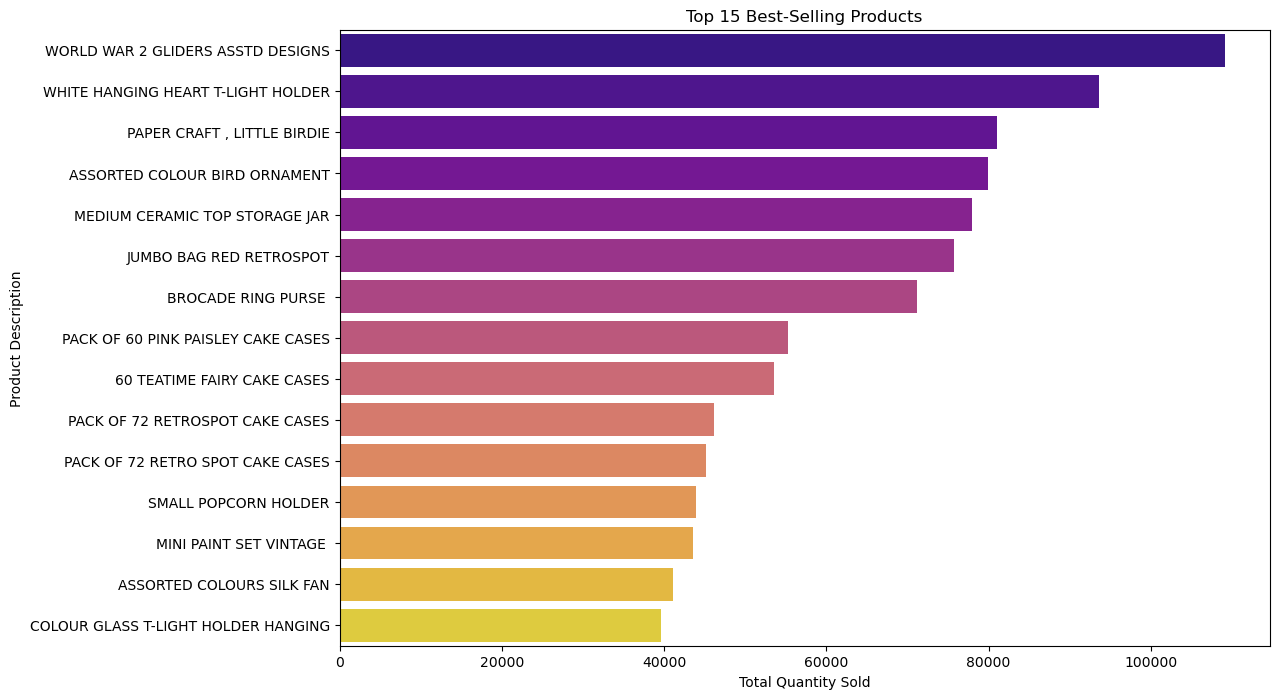

In [13]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.title('Top 15 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

### Sales by Day of the Week/Hour: When are our customers most active?

Text(0.5, 1.0, 'Sales by Hour of the Day')

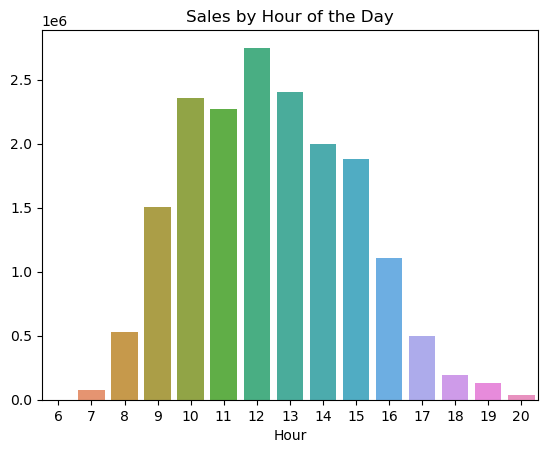

In [14]:
# Sales by Hour
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Sales by Hour of the Day')

## 4. Advanced Analysis

To gain deeper insights, we will perform customer segmentation and market basket analysis.

### 4.1 Customer Segmentation with RFM Analysis
RFM (Recency, Frequency, Monetary) is a powerful marketing technique to segment customers based on their purchasing behavior. This will help us identify our most valuable customers.

In [15]:
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'MonetaryValue'}, inplace=True)

Create RFM Segments:

In [16]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=f_labels)
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)

def join_rfm(x): return str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

**Interpreting the Segments:** A customer with a score of '444' is our best customer (recent, frequent, high-spending), while a '111' is a customer we are at risk of losing.



### 4.2 market basket analysis

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

# For this, we'll focus on a single country, e.g., Germany
import warnings
warnings.filterwarnings('ignore')
basket_df = df[df['Country'] == 'Germany'].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket_df.applymap(encode_units)

In [24]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.head())

                    antecedents                   consequents  \
0                     (POSTAGE)      (6 RIBBONS RUSTIC CHARM)   
1      (6 RIBBONS RUSTIC CHARM)                     (POSTAGE)   
2  (JUMBO BAG WOODLAND ANIMALS)                     (POSTAGE)   
3                     (POSTAGE)  (JUMBO BAG WOODLAND ANIMALS)   
4          (LUNCH BAG WOODLAND)                     (POSTAGE)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.575342            0.076712  0.065753    0.114286  1.489796   
1            0.076712            0.575342  0.065753    0.857143  1.489796   
2            0.067580            0.575342  0.060274    0.891892  1.550193   
3            0.575342            0.067580  0.060274    0.104762  1.550193   
4            0.059361            0.575342  0.052055    0.876923  1.524176   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.021618    1.042422       0.774194  0.11215

### 4.3 In-Depth Analysis: Customer Purchasing Patterns 🕒

To gain a deeper understanding of our customer base, we can analyze when they are most active. A simple bar chart can show the busiest hour or day, but a heatmap can reveal the intersection of these two dimensions, uncovering more nuanced patterns. For example, are weekend mornings busier than weekday afternoons? This visualization helps answer such questions at a glance.

First, we need to create a pivot table that aggregates our sales data (TotalPrice) by both the DayOfWeek and the Hour.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Ensure your main dataframe 'df' is loaded and cleaned before this step ---
# Example: df['DayOfWeek'] and df['Hour'] columns should already exist.

# Create a pivot table to structure the data for the heatmap
customer_activity = df.groupby(['DayOfWeek', 'Hour'])['TotalPrice'].sum().unstack()

# Optional: Reindex the days to start from Monday (0) to Sunday (6)
customer_activity = customer_activity.reindex([0, 1, 2, 3, 4, 5, 6])

# Display the first few rows of the pivot table to check
print(customer_activity.head())


Hour         6         7          8           9           10          11  \
DayOfWeek                                                                  
0           NaN  15880.42   90521.54  244838.340  353661.911  343269.622   
1           NaN  11532.26  117434.68  301523.180  502544.871  472146.790   
2           NaN  10110.76   89468.92  258000.690  465573.530  391879.991   
3          4.25  16494.41  123070.32  283388.230  471967.561  395728.470   
4           NaN  22194.72  108382.20  419056.321  389026.450  347056.000   

Hour              12          13         14          15          16  \
DayOfWeek                                                             
0          407820.43  443580.520  337241.67  283179.581  222159.431   
1          476554.13  444497.390  337727.27  344871.320  240176.900   
2          549526.29  438051.481  367717.18  281690.581  192070.350   
3          530749.99  401029.711  404334.42  441292.820  257463.680   
4          427484.82  324914.342  303862.

Now that the data is structured correctly, we can use seaborn to create a professional and easy-to-read heatmap. We will customize it with a distinct color map, clear labels, and a descriptive title.

c:\Users\prasa\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


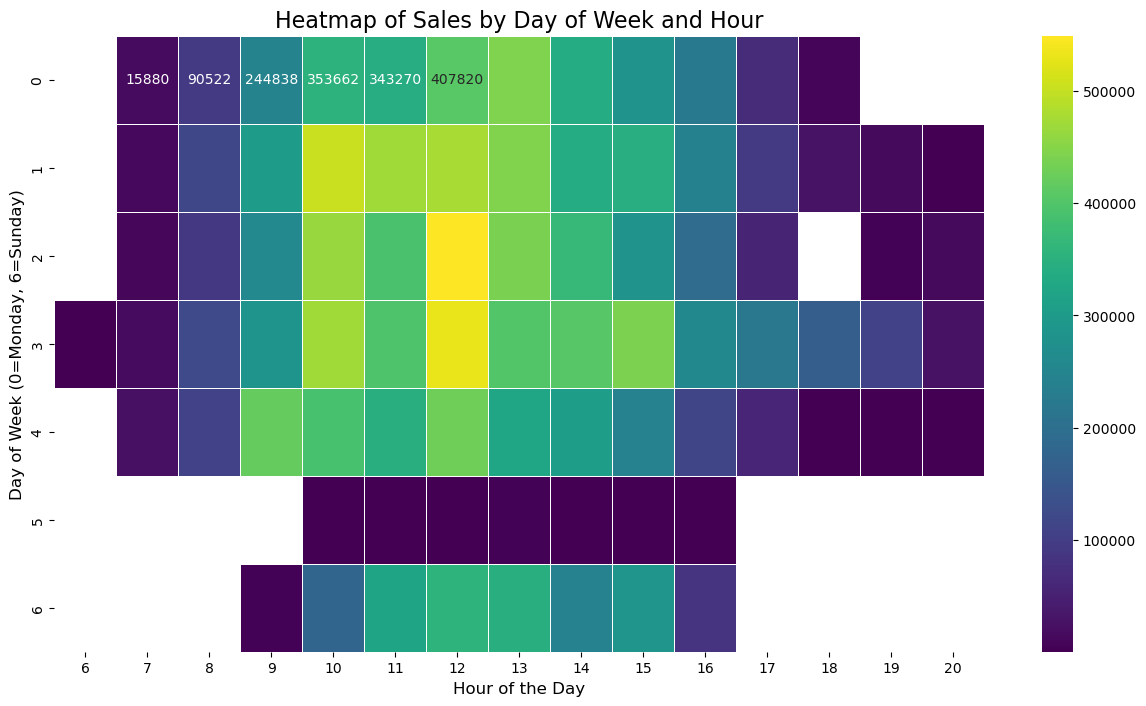

In [21]:
# Set the figure size for better readability
plt.figure(figsize=(15, 8))

# Create the heatmap
sns.heatmap(customer_activity, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)

# Add professional titles and labels
plt.title('Heatmap of Sales by Day of Week and Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)

# Show the plot
plt.show()

## 5. Conclusion & Recommendations

This analysis confirms the business is on a strong growth path with clear opportunities for optimization. Based on the data, we recommend the following actions:

1.  **Capitalize on Seasonality:** Launch targeted marketing campaigns leading up to the November-December peak.
2.  **Focus on the German Market:** Develop a dedicated marketing strategy for Germany.
3.  **Implement a Segmented CRM Strategy:** Create personalized campaigns based on RFM segments.
4.  **Create Data-Driven Product Bundles:** Utilize market basket analysis insights to create product bundles and recommendations.